In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.var.modules.var_commons import convert_dates_with_mappings, load_and_prepare_data

DATA_DIR="../../../data/labeling/output"
OUTLETS = ["24sata", "dnevnik", "jutarnji", "vecernji", "index"]

READ_OUTLETS = ["24sata", "dnevnik", "vecernji", "jutarnji", "index"]


In [2]:
# merge READ_OUTLETS results into 1 dataframe
df = None
for outlet in READ_OUTLETS:
    current_outlet_path = os.path.join(DATA_DIR, f"{outlet}.csv")
    current_outlet_df = pd.read_csv(current_outlet_path)
    if df is None:
        df = current_outlet_df
    else:
        df = pd.concat([current_outlet_df, df], axis=0)

# PAZI NA OVU LINIJU DA NE OTKOMENTIRAŠ SLUČAJNO!
#df = df[df['Impact'] >= 4]

#outlet_path = os.path.join(DATA_DIR, "dnevnik.csv")
#df = pd.read_csv(outlet_path)

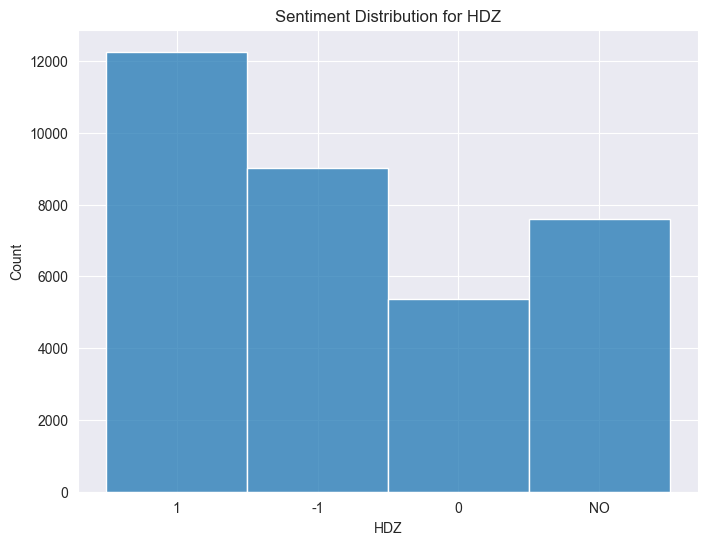

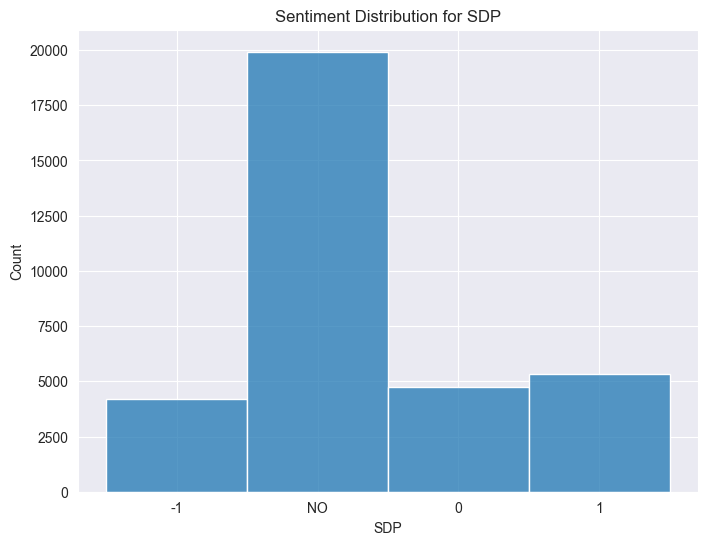

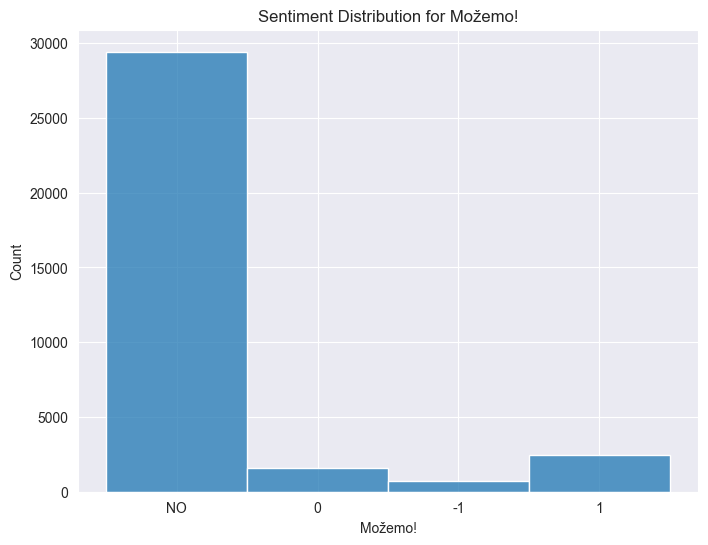

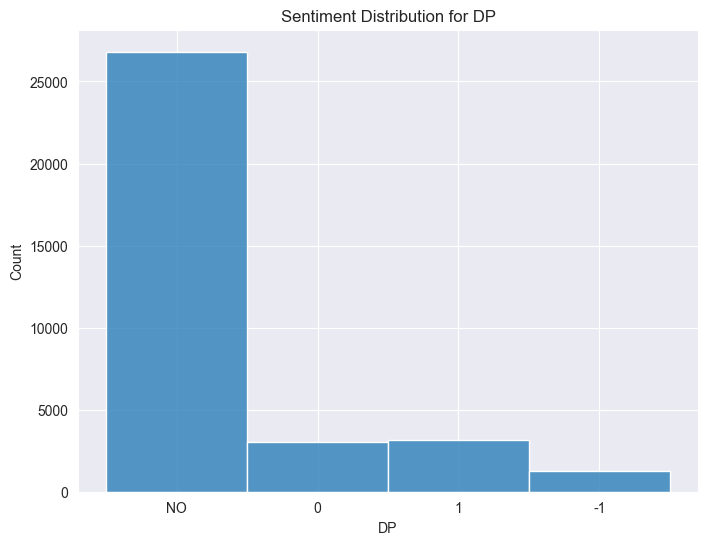

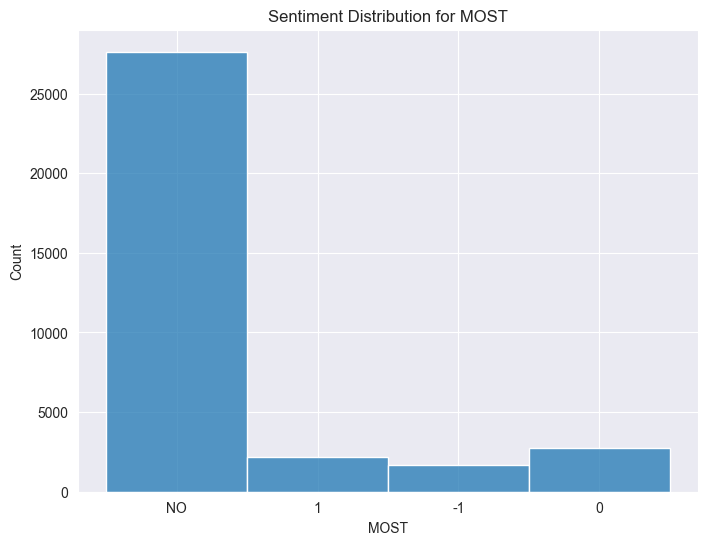

In [3]:
# Plot the distribution of sentiment for each party
parties = ['HDZ', 'SDP', 'Možemo!', 'DP', 'MOST']
sentiment_order = [-1, 0, 1, 'NO']
for party in parties:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=party, kde=False, bins=sentiment_order, discrete=True)
    plt.title(f'Sentiment Distribution for {party}')
plt.show()

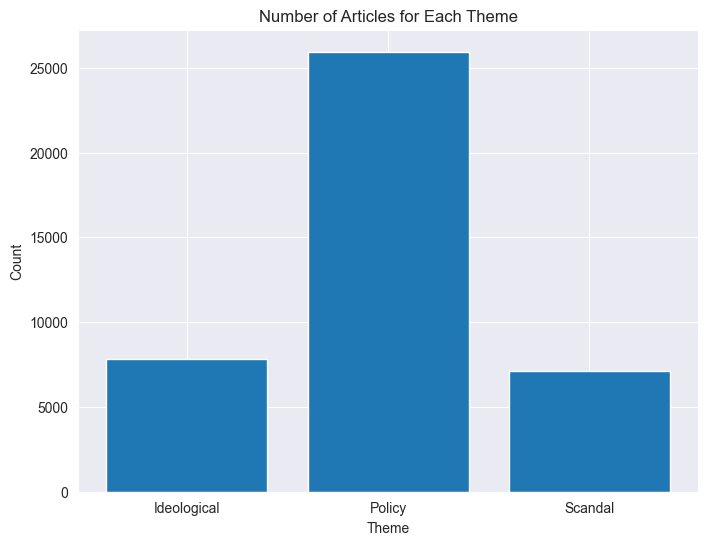

In [4]:
# Define the themes
themes = ['Ideological', 'Policy', 'Scandal']

# Initialize a list to store the counts
counts = []

# For each theme, count the number of articles that are labeled as '1'
for theme in themes:
    counts.append(df[df[theme] == 1].shape[0])

# Create a bar plot
plt.figure(figsize=(8,6))
plt.bar(themes, counts)
plt.title('Number of Articles for Each Theme')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.show()


In [5]:
# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# create a new column for the year and month
df['year_month'] = df['date'].dt.to_period('M')

# initialize an empty dataframe to store the mean sentiments
mean_sentiments_df = pd.DataFrame()
mean_sentiments_weighted_df = pd.DataFrame()

#for each party, calculate the mean sentiment for each month
for party in parties:
    df[party] = pd.to_numeric(df[party], errors='coerce')
    mean_sentiments_df[party] = df.groupby('year_month')[party].mean()

df["Impact"] = pd.to_numeric(df["Impact"], errors='coerce')

# weighted sentiment by article impact
for party in parties:
    df[party] = pd.to_numeric(df[party], errors='coerce')
    mean_sentiments_weighted_df[party] = (df[party] * df['Impact']).groupby(df['year_month']).sum() / df['Impact'].groupby(df['year_month']).sum()

mean_sentiments_df.to_csv(os.path.join(DATA_DIR, "mean_sentiments.csv"))
mean_sentiments_weighted_df.to_csv(os.path.join(DATA_DIR, "mean_sentiments_weighted.csv"))

mean_sentiments_df.reset_index(inplace=True)
mean_sentiments_weighted_df.reset_index(inplace=True)

mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-06,0.128571,-0.012821,0.642857,0.402806,0.111913
1,2020-07,0.350627,-0.128302,0.533854,0.289744,0.192744
2,2020-08,0.433486,0.138075,0.481818,0.388646,0.100000
3,2020-09,0.342282,0.109948,0.524590,0.373737,0.064103
4,2020-10,-0.005814,0.173333,0.381818,0.333333,0.115385
5,2020-11,0.190687,0.108871,0.361702,0.270968,0.144578
6,2020-12,0.164384,0.065625,0.220930,0.411043,-0.188811
7,2021-01,0.067024,0.271739,0.565789,0.076923,0.178571
8,2021-02,0.070193,0.140594,0.324324,0.204969,0.022523
9,2021-03,0.156863,0.211297,0.463235,0.340611,0.090909


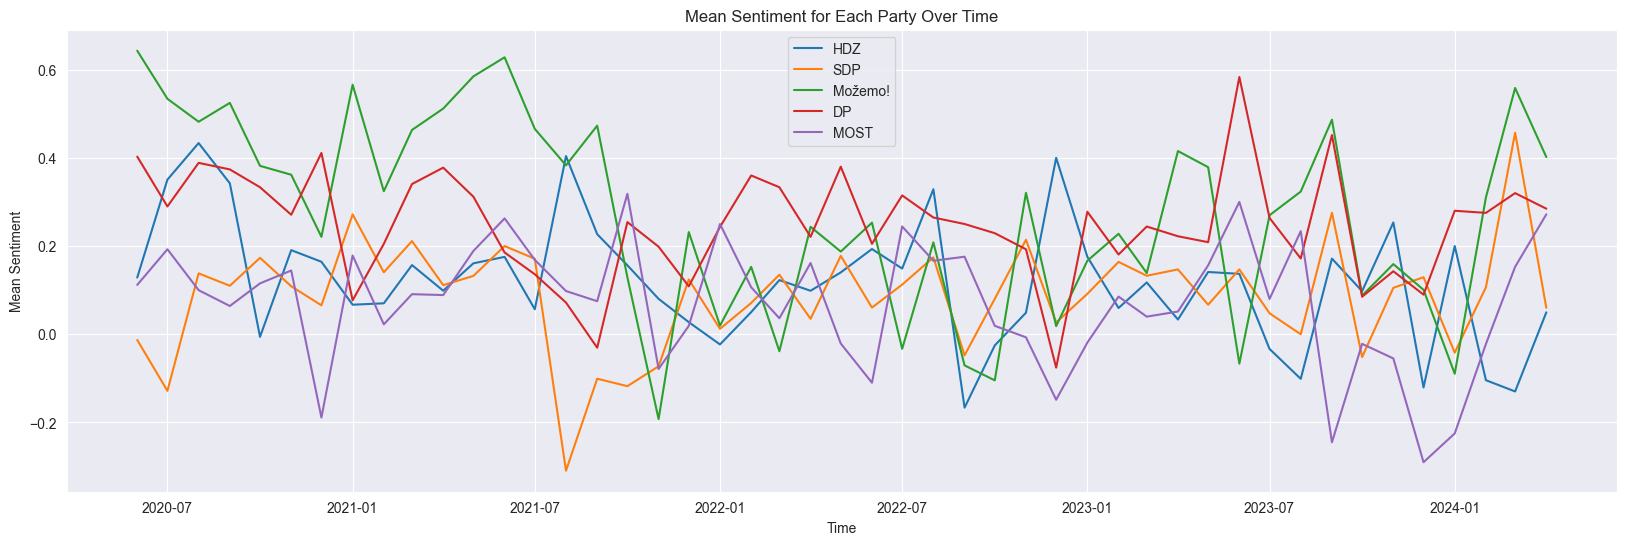

In [6]:
mean_sentiments_df['year_month'] = mean_sentiments_df['year_month'].dt.to_timestamp()

# For each party, plot a line plot of the mean sentiment over time
plt.figure(figsize=(20,6))
for party in parties:
    plt.plot(mean_sentiments_df['year_month'], mean_sentiments_df[party], label=party)

plt.title('Mean Sentiment for Each Party Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.show()

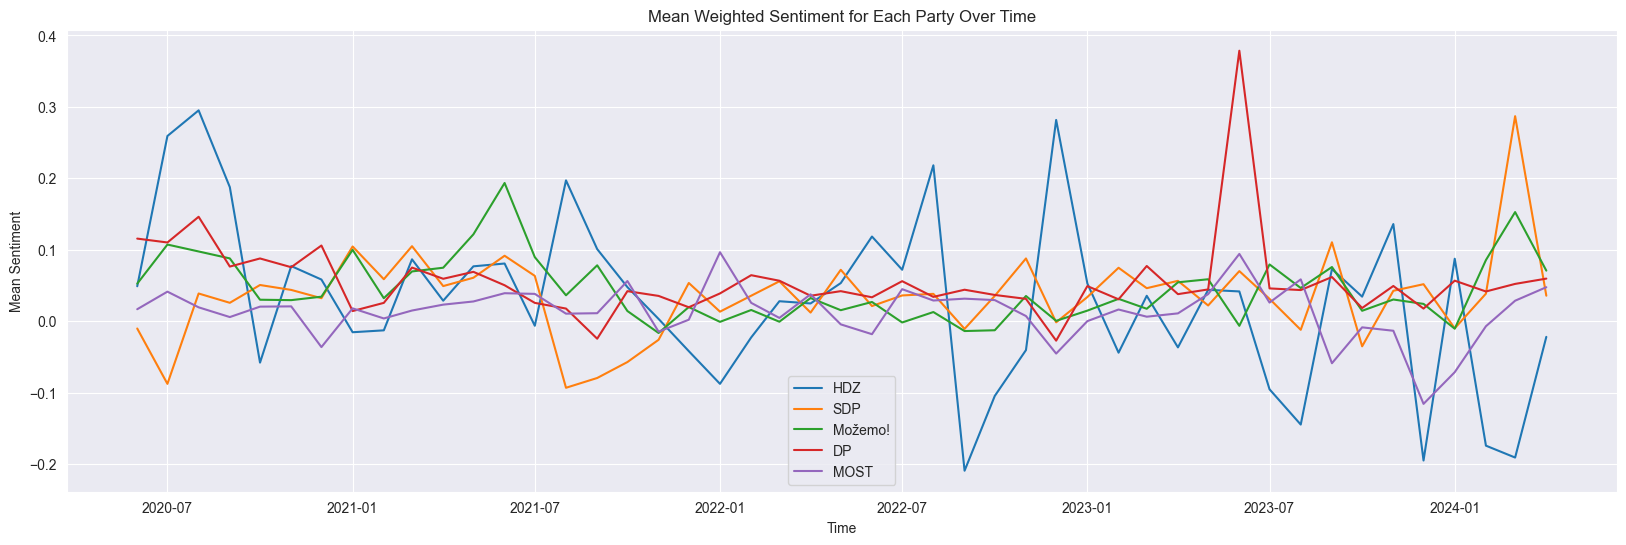

In [7]:
mean_sentiments_weighted_df['year_month'] = mean_sentiments_weighted_df['year_month'].dt.to_timestamp()

# For each party, plot a line plot of the mean sentiment over time
plt.figure(figsize=(20,6))
for party in parties:
    plt.plot(mean_sentiments_weighted_df['year_month'], mean_sentiments_weighted_df[party], label=party)

plt.title('Mean Weighted Sentiment for Each Party Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.show()

In [8]:
mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-06-01,0.128571,-0.012821,0.642857,0.402806,0.111913
1,2020-07-01,0.350627,-0.128302,0.533854,0.289744,0.192744
2,2020-08-01,0.433486,0.138075,0.481818,0.388646,0.100000
3,2020-09-01,0.342282,0.109948,0.524590,0.373737,0.064103
4,2020-10-01,-0.005814,0.173333,0.381818,0.333333,0.115385
5,2020-11-01,0.190687,0.108871,0.361702,0.270968,0.144578
6,2020-12-01,0.164384,0.065625,0.220930,0.411043,-0.188811
7,2021-01-01,0.067024,0.271739,0.565789,0.076923,0.178571
8,2021-02-01,0.070193,0.140594,0.324324,0.204969,0.022523
9,2021-03-01,0.156863,0.211297,0.463235,0.340611,0.090909


In [9]:
mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-06-01,0.128571,-0.012821,0.642857,0.402806,0.111913
1,2020-07-01,0.350627,-0.128302,0.533854,0.289744,0.192744
2,2020-08-01,0.433486,0.138075,0.481818,0.388646,0.100000
3,2020-09-01,0.342282,0.109948,0.524590,0.373737,0.064103
4,2020-10-01,-0.005814,0.173333,0.381818,0.333333,0.115385
5,2020-11-01,0.190687,0.108871,0.361702,0.270968,0.144578
6,2020-12-01,0.164384,0.065625,0.220930,0.411043,-0.188811
7,2021-01-01,0.067024,0.271739,0.565789,0.076923,0.178571
8,2021-02-01,0.070193,0.140594,0.324324,0.204969,0.022523
9,2021-03-01,0.156863,0.211297,0.463235,0.340611,0.090909


In [10]:
data_df = load_and_prepare_data('../../../data/monthly-time-series/AI-izbori_stranke_krace_v2_INFL.csv', keep_columns=['NEODLUCNI', 'INFLACIJA'])
data_df.reset_index(inplace=True)
data_df.rename(columns={'index': 'year_month'}, inplace=True)
data_df

,year_month,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-06-01,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [11]:
mean_sentiments_df.rename(columns={'HDZ': 'HDZ_senti', 'SDP': 'SDP_senti', 'DP': 'DP_senti', 'Možemo!': 'MOZEMO_senti', 'MOST': 'MOST_senti'}, inplace=True)
mean_sentiments_weighted_df.rename(columns={'HDZ': 'HDZ_senti', 'SDP': 'SDP_senti', 'DP': 'DP_senti', 'Možemo!': 'MOZEMO_senti', 'MOST': 'MOST_senti'}, inplace=True)

merged_df = pd.merge(mean_sentiments_df, data_df, on='year_month')
merged_df_weighted = pd.merge(mean_sentiments_weighted_df, data_df, on='year_month')

In [12]:
merged_df

,year_month,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-06-01,0.128571,-0.012821,0.642857,0.402806,0.111913,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,0.350627,-0.128302,0.533854,0.289744,0.192744,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,0.433486,0.138075,0.481818,0.388646,0.100000,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,0.342282,0.109948,0.524590,0.373737,0.064103,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,-0.005814,0.173333,0.381818,0.333333,0.115385,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,0.190687,0.108871,0.361702,0.270968,0.144578,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,0.164384,0.065625,0.220930,0.411043,-0.188811,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,0.067024,0.271739,0.565789,0.076923,0.178571,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,0.070193,0.140594,0.324324,0.204969,0.022523,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,0.156863,0.211297,0.463235,0.340611,0.090909,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [13]:
merged_df_weighted

,year_month,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-06-01,0.048820,-0.010306,0.052482,0.115541,0.016680,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,0.259177,-0.087805,0.107219,0.110119,0.041281,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,0.295062,0.038683,0.097531,0.146091,0.019342,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,0.187571,0.025656,0.087799,0.076397,0.005701,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,-0.058071,0.050578,0.029972,0.087730,0.020293,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,0.077076,0.043703,0.029400,0.075487,0.020660,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,0.058222,0.032110,0.034227,0.105857,-0.036344,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,-0.015537,0.104520,0.099812,0.014124,0.017891,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,-0.012884,0.058672,0.032111,0.025570,0.003766,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,0.086536,0.104928,0.069559,0.074982,0.014855,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [14]:
print("HDZ: ", merged_df["HDZ"].corr(merged_df["HDZ_senti"]))
print("SDP: ", merged_df["SDP"].corr(merged_df["SDP_senti"]))
print("MOST: ", merged_df["MOST"].corr(merged_df["MOST_senti"]))
print("DP: ", merged_df["DP"].corr(merged_df["DP_senti"]))
print("Možemo!: ", merged_df["MOZEMO"].corr(merged_df["MOZEMO_senti"]))


HDZ:  0.41255979986960195
SDP:  0.20094157971344123
MOST:  -0.08693125485725366
DP:  0.18384711050607866
Možemo!:  0.0903637555712369


In [15]:
# TODO: možeš isključiti sentiment onih stranki koji nije koreliran s podrškama tim strankama

print("HDZ: ", merged_df_weighted["HDZ"].corr(merged_df_weighted["HDZ_senti"]))
print("SDP: ", merged_df_weighted["SDP"].corr(merged_df_weighted["SDP_senti"]))
print("MOST: ", merged_df_weighted["MOST"].corr(merged_df_weighted["MOST_senti"]))
print("DP: ", merged_df_weighted["DP"].corr(merged_df_weighted["DP_senti"]))
print("Možemo!: ", merged_df_weighted["MOZEMO"].corr(merged_df_weighted["MOZEMO_senti"]))

HDZ:  0.3930144101014603
SDP:  0.21830473452189683
MOST:  0.05492715968430406
DP:  0.2566406406911955
Možemo!:  0.23264156044938872


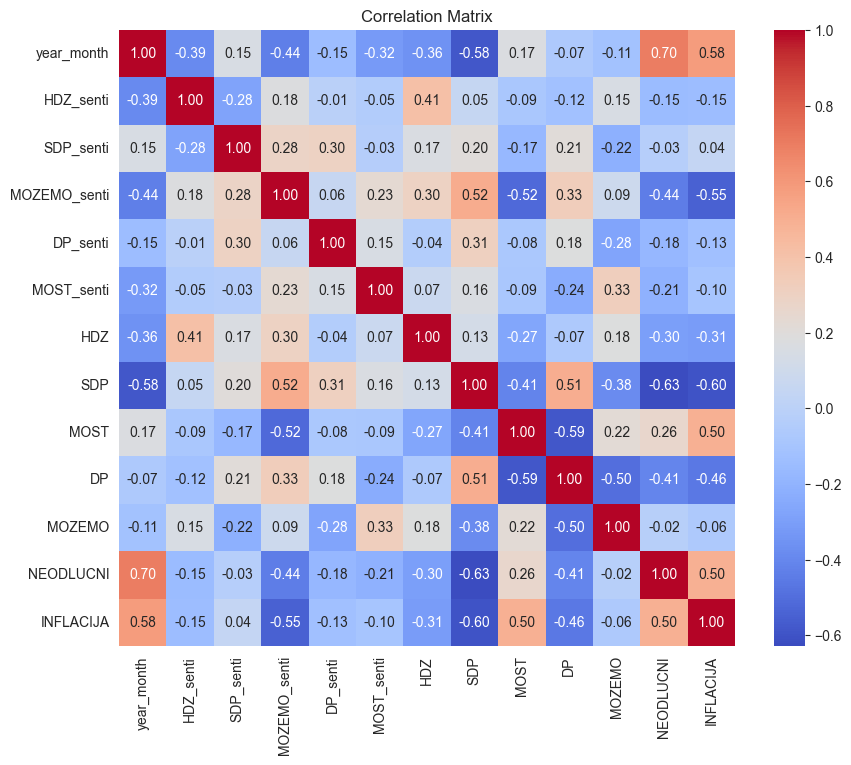

In [16]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

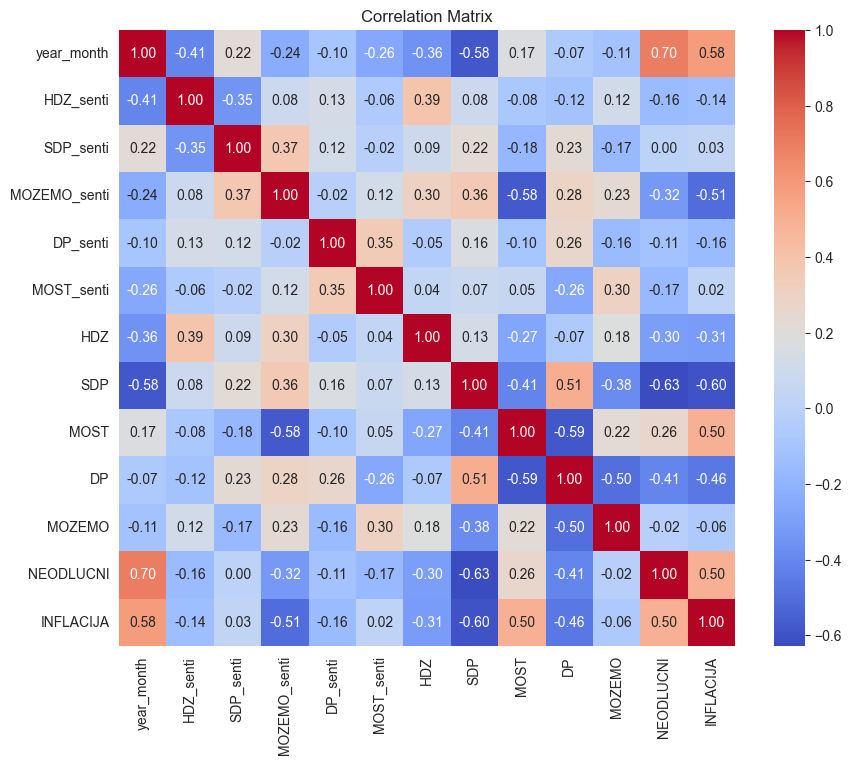

In [17]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_weighted.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
merged_df.to_csv("../../../data/monthly-time-series/full_data_normal_senti.csv")
merged_df_weighted.to_csv("../../../data/monthly-time-series/full_data_weighted_senti.csv")